# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
What if the appointment you didn't show for was crucial for your health?...<br>
What did you miss?...<br>
The dataset contains information about medical appointments in Brazil, including patient ID, appointment ID, gender, age, appointment date, scheduled appointment date, neighborhood, SMS received, and no-show status. The dataset was collected from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).<br>
Primarily, this analysis will figure out why would any person miss a medical appointment.<br>
<table>
    <thead>
        <tr>
            <th>Column</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>PatientId</td>
            <td>Unique identifier for each patient</td>
        </tr>
        <tr>
            <td>AppointmentID</td>
            <td>Unique identifier for each appointment</td>
        </tr>
        <tr>
            <td>Gender</td>
            <td>Male or Female</td>
        </tr>
        <tr>
            <td>ScheduledDay</td>
            <td>The day of the actual appointment, when they have to visit the doctor.</td>
        </tr>
        <tr>
            <td>AppointmentDay</td>
            <td>The day someone called or registered the appointment, this is before appointment of course.</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>How old is the patient.</td>
        </tr>
        <tr>
            <td>Neighborhood</td>
            <td>Where the appointment takes place.</td>
        </tr>
        <tr>
            <td>Scholarship</td>
            <td>True if the patient was enrolled in Brasilian welfare program called Scholarship, False otherwise.</td>
        </tr>
        <tr>
            <td>Hypertension</td>
            <td>True if the patient has hypertension, False otherwise.</td>
        <tr>
        <tr>
            <td>Diabetes</td>
            <td>True if the patient has diabetes, False otherwise.</td>
        </tr>
        <tr>
            <td>Alcoholism</td>
            <td>True if the patient is an alcoholic, False otherwise.</td>
        </tr>
        <tr>
            <td>Handcap</td>
            <td>True if the patient has a handcap, False otherwise.</td>
        </tr>
        <tr>
            <td>SMS_received</td>
            <td>1 or more messages sent to the patient.</td>
        </tr>
        <tr>
            <td>No-show</td>
            <td>True if the patient did not show up to their appointment, False otherwise.</td>
        </tr>
</table>

### Question(s) for Analysis

- What is the relationship between the patient's age, gender, and no-show status?
- How does the number of SMS received affect the no-show status?
- What is the distribution of no-shows across different neighborhoods?

In [162]:
import numpy as np 
import pandas as pd

<a id='wrangling'></a>
## Data Wrangling

In [ ]:
# Read the csv file and make a DataFrame
df = pd.read_csv('./noshowappointments-kagglev2-may-2016.csv')

# Display the first few rows of the dataset

df.head()

# Shape of the DataFrame

df.shape

# Inspect the datatypes and more with .info() function

df.info()

''' Fortunately, there is no missing values in the dataset as will appear from the returned data from .info() function'''

# Check for missing values (Further assurance)

df.isnull().sum()

# Get primary measures by .describe() function

df.describe()

# Check for unique values 

df.nunique()



### Data Cleaning

First step of cleaning will be the removal of patientID and appointmentID from the DataFrame since they are not useful
in the analysis process

In [ ]:
# Drop the 'PatientId' and 'AppointmentID' columns as they don't provide any useful information

df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# Get a few lines from the DataFrame to check the drop operation

df.head()

Now, we want to change the datatype of scheduledDay and appointmentDay to datetime

In [ ]:
# Convert the datatype to datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Display the first few rows of the DataFrame to check the conversion

df.head()


Next, let's convert the 'No-show' column to boolean. True means the patient did not show up, False means the patient did show up.

In [ ]:
# Convert the datatype to boolean

df['No-show'] = df['No-show'].apply(lambda x: True if x == 'Yes' else False)

# Display the first few rows of the DataFrame to check the conversion

df.head()


In [ ]:
# Check the datatypes again

df.info()


Here I want to rename the hipertension column into hypertension

In [167]:
# Renaming the column name

df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

In [ ]:
# Check the conversion

df.info()


Currently, let's convert the 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism','Handcap'<br>
and 'SMS_received' columns to boolean. True means the patient has the condition, False means the patient does not have the condition.




In [ ]:
# Convert the datatypes to boolean

df['Scholarship'] = df['Scholarship'].apply(lambda x: True if x == 1 else False)
df['Hypertension'] = df['Hypertension'].apply(lambda x: True if x == 1 else False)
df['Diabetes'] = df['Diabetes'].apply(lambda x: True if x == 1 else False)
df['Alcoholism'] = df['Alcoholism'].apply(lambda x: True if x == 1 else False)
df['Handcap'] = df['Handcap'].apply(lambda x: True if x == 1 else False)
df['SMS_received'] = df['SMS_received'].apply(lambda x: True if x > 0 else False)

# Display the first few rows of the DataFrame to check the conversion

df.head()

Now, We have to convert the names of columns to lower case

In [ ]:
# Convert column names to lower case

df.columns = df.columns.str.lower()

# Display the DataFrame columns to check the conversion

df.columns


Lastly, I will optimize the datatype of some columns in order to optimize the usage of memory allocation

In [ ]:
# Convert the datatypes to the most memory-efficient types

df['age'] = df['age'].astype('int8')

# Check the new datatype and memory allocation

df.info()
df.head()

Now, the dataset is clean and optimized. We have converted the necessary columns to boolean, converted the datatype to the <br>
most memory-efficient types, and renamed the column 'Hipertension' to 'Hypertension'. We have also dropped the <br> 'PatientId' and 'AppointmentID' columns.

Next, we will move on to the next step of data analysis, which is exploring the relationships between different <br> variables and answering the questions we posed earlier.


<a id='eda'></a>
## Exploratory Data Analysis

Now, we will analyze the data to answer the questions we posed earlier.

### Research Question 1

First, we want to see the percentage of the no-shows

In [ ]:
# Calculate the percentage of no-shows

no_shows_percentage = (df['no-show'].sum() / df.shape[0]) * 100
no_shows_percentage

The dataset contains approximately 20.2% no-shows.<br>
This means that approximately 20.2% of the patients did not show up to their appointments, which is actually a small percentage, isn't it? :)

Next, let's find out the relationship between the patient's age, gender, and no-show status.<br>
First with the age...

In [ ]:
# Calculate the mean age of no-shows and shows

no_shows_age = df[df['no-show'] == True]['age'].mean()
shows_age = df[df['no-show'] == False]['age'].mean()

print(np.round(no_shows_age))
print(np.round(shows_age))


The mean age of no-shows is approximately 34, and the mean age of shows is approximately 38.<br> This indicates that the average age of patients who did not show up to their appointments is slightly<br> **younger** than the average age of patients who did show up.<br>

Now, let's figure out the relationship between gender and no-show status

In [ ]:


# Calculate the percentage of no-shows for each gender

no_shows_gender = df[df['no-show'] == True]['gender'].value_counts(normalize=True) * 100

print(no_shows_gender)



The percentage of no-shows for females is approximately 65.4%, and the percentage of no-shows for males is approximately 35%.<br> This indicates that females are more likely to not show up to their appointments than males.

Now, let's plot to find the relationship between age and no-show, and the relationship between gender and no-show.

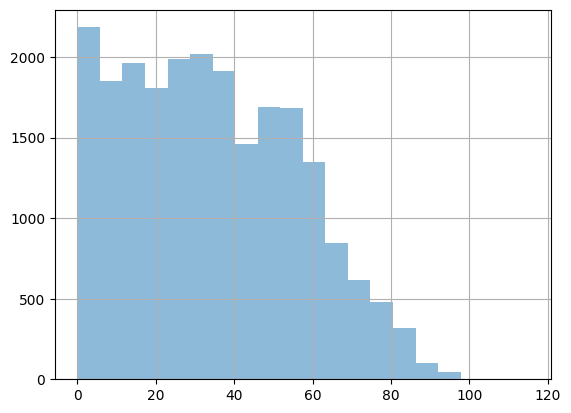

In [148]:
# Plot the distribution of no-shows by age

df[df['no-show'] == True]['age'].hist(bins=20, alpha=0.5, label='No-shows');

### Research Question 2

Now, we want to find how would the sms_received affect the no-show status?

In [142]:


# Calculate the percentage of no-shows for each SMS received status

no_shows_sms = df[df['no-show'] == True]['sms_received'].value_counts(normalize=True) * 100

print(no_shows_sms)



sms_received
False    56.162911
True     43.837089
Name: proportion, dtype: float64



The percentage of no-shows for patients who received no messages is approximately 56%, and the percentage of no-shows for patients who received at least one message is approximately 44%.<br> This indicates that receiving messages affects the no-show status.

Now, let's plot the distribution of no-shows by sms_received



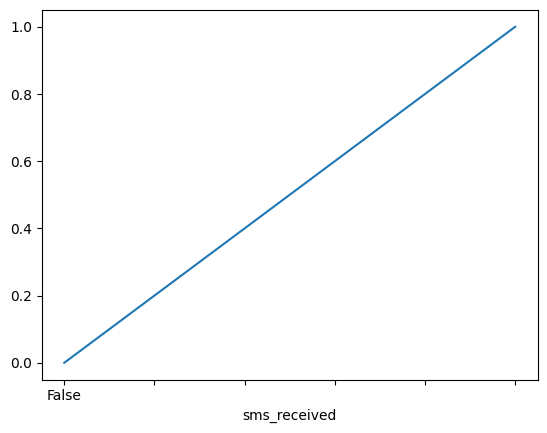

In [147]:

df[df['no-show'] == True].groupby('sms_received')['sms_received'].mean(numeric_only=True).plot(x='no-show', y='sms_received', kind='line');

### Research Question 3

Now, we want to find the distribution of no-shows across different neighborhoods



In [ ]:

# Calculate the percentage of no-shows for each neighborhood

no_shows_neighborhood = df[df['no-show'] == True]['neighbourhood'].value_counts(normalize=True) * 100

print(no_shows_neighborhood.sort_values(ascending=False).head())
print(no_shows_neighborhood.max())


The neighborhood with the highest percentage of no-shows is 'JARDIM CAMBURI ', with approximately 6.6% of no-shows.<br> The second highest percentage of no-shows is 'MARIA ORTIZL', with approximately 5.5% of no-shows.<br> The third highest percentage of no-shows is 'ITARARÉ', with approximately 4% of no-shows.

Now, let's plot the distribution of no-shows by neighborhood



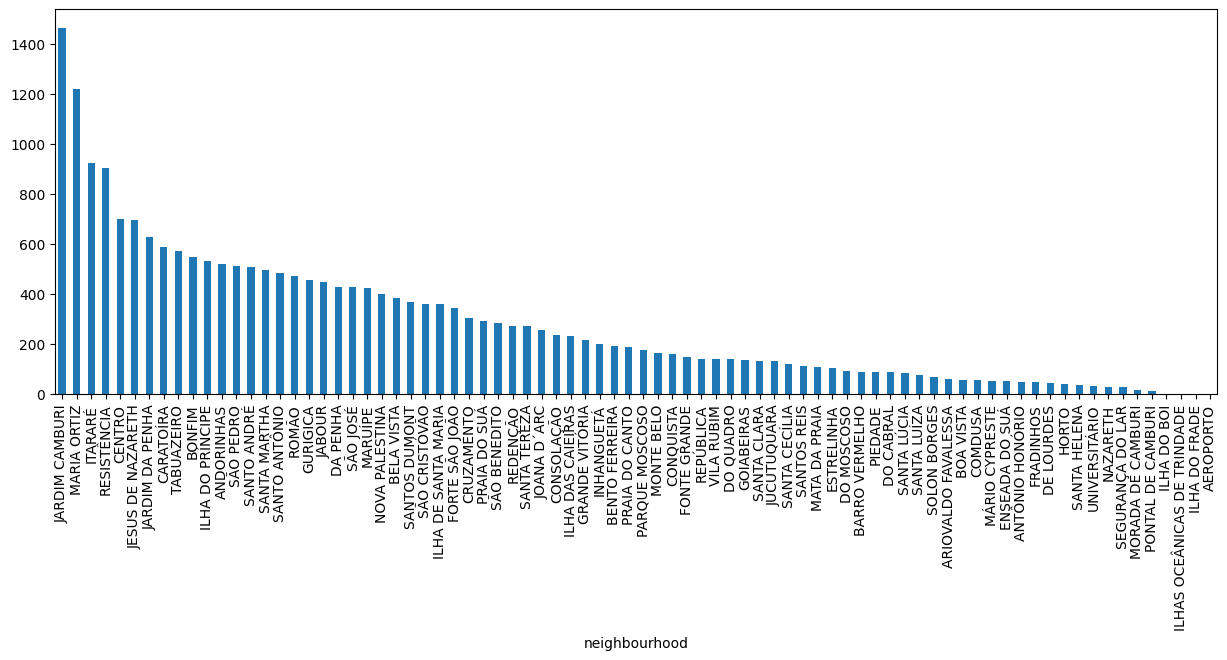

In [155]:

df[df['no-show'] == True]['neighbourhood'].value_counts().plot(kind='bar', figsize=(15, 5));


<a id='conclusions'></a>
## Conclusions


1. The dataset contains approximately 20.2% no-shows.<br>
2. The average age of patients who did not show up to their appointments is slightly younger than the average age of patients who did show up.<br>
3. Females are more likely to not show up to their appointments than males.<br>
4. Receiving messages affects the no-show status.<br>
5. The neighborhood with the highest percentage of no-shows is 'JARDIM CAMBURI ', with approximately 6.6% of no-shows.<br>
6. The second highest percentage of no-shows is 'MARIA ORTIZL', with approximately 5.5% of no-shows.<br>
7. The third highest percentage of no-shows is 'ITARARÉ', with approximately 4% of no-shows.<br>
8. The dataset is clean and optimized for memory allocation, with most columns converted to boolean and the datatype of 'age' optimized to 'int8'.<br>
9. The dataset can be used to answer the questions posed earlier, and the relationships between different variables and no-show status can be visualized using plots.
